In [1]:
!pip install --upgrade pip

!pip install --upgrade nbformat matplotlib==3.10.3 seaborn==0.13.2 plotly==6.1.2 pycountry==24.6.1 networkx==3.5 scipy==1.15.3

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
import matplotlib.ticker as mtick
from collections import Counter

In [3]:
df = pd.read_csv('top500_transformed.csv', index_col=0)

In [4]:
df.head()

,title,year,duration,rating_value,rating_count,critic_rating_value,critic_count,directors,screenwriters,production_countries,...,boxoffice_outside_usa,budget,genres,duration_minutes,world_premiere_parsed,polish_premiere_parsed,boxoffice_in$,boxoffice_usa_in$,boxoffice_outside_usa_in$,budget_in$
position,,,,,,,,,,,,,,,,,,,,,
1,The Shawshank Redemption,1994,2h 22m,"8,8",955674,"8,2",91,['Frank Darabont'],['Frank Darabont'],['USA'],...,$117 315,$25 000 000,['Dramat'],142,1994-09-10,1995-04-16,28884504.0,28767189.0,117315.0,25000000.0
2,The Green Mile,1999,3h 8m,"8,6",1030633,"7,2",73,['Frank Darabont'],['Frank Darabont'],['USA'],...,$150 000 000,$60 000 000,['Dramat'],188,1999-12-06,2000-03-24,286801374.0,136801374.0,150000000.0,60000000.0
3,Intouchables,2011,1h 52m,"8,6",703261,"7,1",86,"['Olivier Nakache', 'Éric Toledano']","['Olivier Nakache', 'Éric Toledano']",['Francja'],...,$416 389 690,$10 800 000,"['Biograficzny', 'Dramat', 'Komedia']",112,2011-09-23,2012-04-13,426588510.0,10198820.0,416389690.0,10800000.0
4,The Godfather,1972,2h 55m,"8,6",566582,"9,1",87,['Francis Ford Coppola'],"['Mario Puzo', 'Francis Ford Coppola']",['USA'],...,$113 960 743,$6 000 000,"['Dramat', 'Gangsterski']",175,1972-03-14,1972-12-31,250341816.0,136381073.0,113960743.0,6000000.0
5,12 Angry Men,1957,1h 36m,"8,7",236509,"8,9",86,['Sidney Lumet'],['Reginald Rose'],['USA'],...,NaN,NaN,['Dramat sądowy'],96,1957-04-10,1959-11-01,337000.0,NaN,NaN,NaN


Transforming rating columns to numerical values.

In [5]:
df['rating_value'] = df['rating_value'].str.replace(',', '.')
df['rating_value'] = pd.to_numeric(df['rating_value'], errors='coerce')

df['critic_rating_value'] = df['critic_rating_value'].str.replace(',', '.')
df['critic_rating_value'] = pd.to_numeric(df['critic_rating_value'], errors='coerce')

Using explode() function on 'genres' column.

In [6]:
# Changing string to lists
df['genres'] = df['genres'].apply(ast.literal_eval)

df_genres = df.explode('genres').reset_index(drop=False)

In [9]:
df_genres[['title','genres']].head(10)

,title,genres
0,The Shawshank Redemption,Dramat
1,The Green Mile,Dramat
2,Intouchables,Biograficzny
3,Intouchables,Dramat
4,Intouchables,Komedia
5,The Godfather,Dramat
6,The Godfather,Gangsterski
7,12 Angry Men,Dramat sądowy
8,Forrest Gump,Dramat
9,Forrest Gump,Komedia


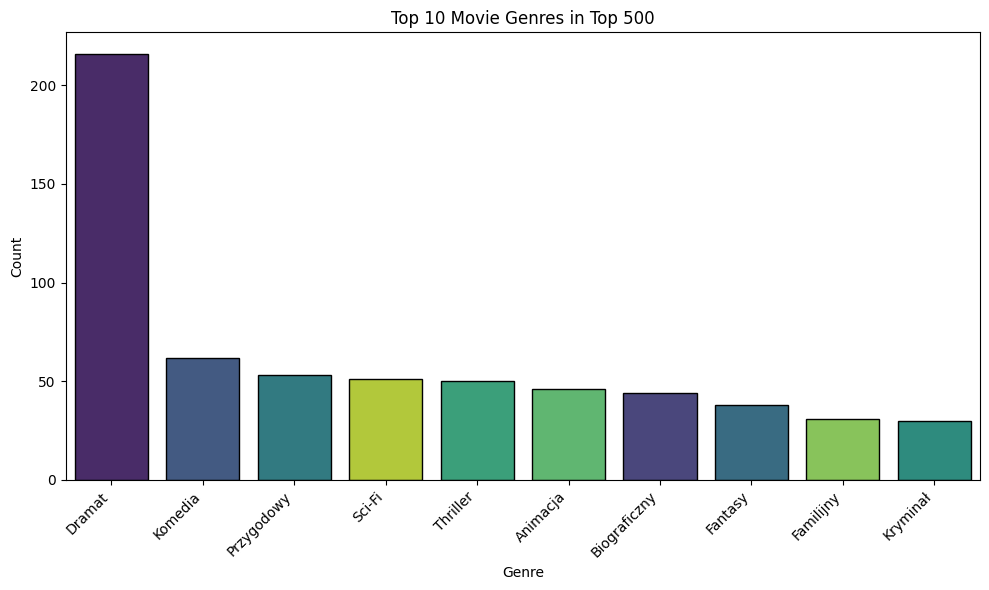

In [40]:
top10_counts = df_genres['genres'].value_counts().head(10)
top10_order = top10_counts.index.tolist()

plt.figure(figsize=(10,6))

ax = sns.countplot(
    data=df_genres[df_genres['genres'].isin(top10_order)],
    x='genres',
    hue='genres',
    palette='viridis',
    dodge=False,
    legend=False,
    order=top10_order,
    edgecolor='black'
)

plt.title('Top 10 Movie Genres in Top 500')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mapping values in the 'genres' column from Polish to English to create a new column with standardized genre names.

In [22]:
df_genres['genres'].unique()

array(['Dramat', 'Biograficzny', 'Komedia', 'Gangsterski',
       'Dramat sądowy', 'Psychologiczny', 'Fantasy', 'Przygodowy',
       'Wojenny', 'Kryminał', 'Thriller', 'Animacja', 'Familijny',
       'Western', 'Surrealistyczny', 'Sci-Fi', 'Dramat historyczny',
       'Dramat obyczajowy', 'Muzyczny', 'Akcja', 'Sensacyjny', 'Anime',
       'Melodramat', 'Komedia kryminalna', 'Kostiumowy', 'Świąteczny',
       'Sportowy', 'Obyczajowy', 'Horror', 'Komedia obycz.', 'Musical',
       'Animacja dla dorosłych', 'Polityczny', 'Dokumentalny',
       'Krótkometrażowy', 'Przyrodniczy', 'Dreszczowiec', 'Film-Noir',
       'Sztuki walki', 'Romans', 'Satyra', 'Komedia rom.',
       'Czarna komedia', 'Groteska filmowa', 'Poetycki', 'Baśń', 'Niemy',
       'Dla młodzieży', 'Biblijny'], dtype=object)

In [20]:
genre_translation = {
    'Dramat': 'Drama',
    'Biograficzny': 'Biographical',
    'Komedia': 'Comedy',
    'Gangsterski': 'Gangster',
    'Dramat sądowy': 'Courtroom Drama',
    'Psychologiczny': 'Psychological',
    'Fantasy': 'Fantasy',
    'Przygodowy': 'Adventure',
    'Wojenny': 'War',
    'Kryminał': 'Crime',
    'Thriller': 'Thriller',
    'Animacja': 'Animation',
    'Familijny': 'Family',
    'Western': 'Western',
    'Surrealistyczny': 'Surrealist',
    'Sci-Fi': 'Science Fiction',
    'Dramat historyczny': 'Historical Drama',
    'Dramat obyczajowy': 'Social Drama',
    'Muzyczny': 'Musical',
    'Akcja': 'Action',
    'Sensacyjny': 'Action Thriller',
    'Anime': 'Anime',
    'Melodramat': 'Melodrama',
    'Komedia kryminalna': 'Crime Comedy',
    'Kostiumowy': 'Costume Drama',
    'Świąteczny': 'Christmas',
    'Sportowy': 'Sports',
    'Obyczajowy': 'Slice of Life',
    'Horror': 'Horror',
    'Komedia obycz.': 'Comedy Drama',
    'Musical': 'Musical',
    'Animacja dla dorosłych': 'Adult Animation',
    'Polityczny': 'Political',
    'Dokumentalny': 'Documentary',
    'Krótkometrażowy': 'Short Film',
    'Przyrodniczy': 'Nature',
    'Dreszczowiec': 'Thriller',
    'Film-Noir': 'Film Noir',
    'Sztuki walki': 'Martial Arts',
    'Romans': 'Romance',
    'Satyra': 'Satire',
    'Komedia rom.': 'Romantic Comedy',
    'Czarna komedia': 'Dark Comedy',
    'Groteska filmowa': 'Grotesque',
    'Poetycki': 'Poetic',
    'Baśń': 'Fairy Tale',
    'Niemy': 'Silent',
    'Dla młodzieży': 'Teen',
    'Biblijny': 'Biblical'
}

df_genres['genres_en'] = df_genres['genres'].map(genre_translation)

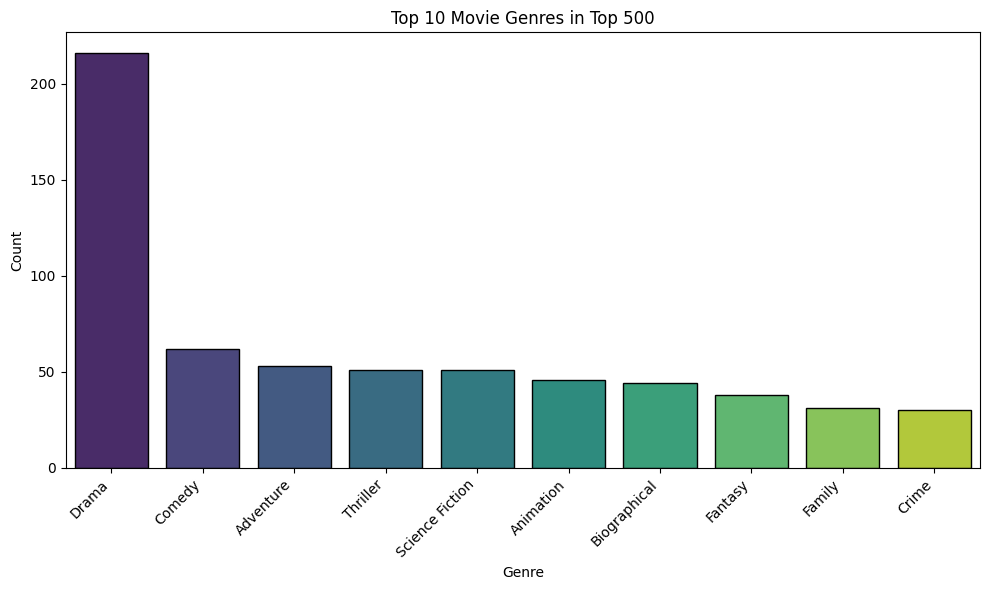

In [38]:
top10_counts = df_genres['genres_en'].value_counts().head(10)
top10_order = top10_counts.index.tolist()

palette = sns.color_palette("viridis", n_colors=10)

color_mapping = dict(zip(top10_order, palette))

plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=df_genres[df_genres['genres_en'].isin(top10_order)],
    x='genres_en',
    hue='genres_en',
    palette=color_mapping,
    dodge=False,
    legend=False,
    order=top10_order,
    edgecolor='black'
)

plt.title('Top 10 Movie Genres in Top 500')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('genres_count.png', dpi=300, bbox_inches='tight')
plt.show()

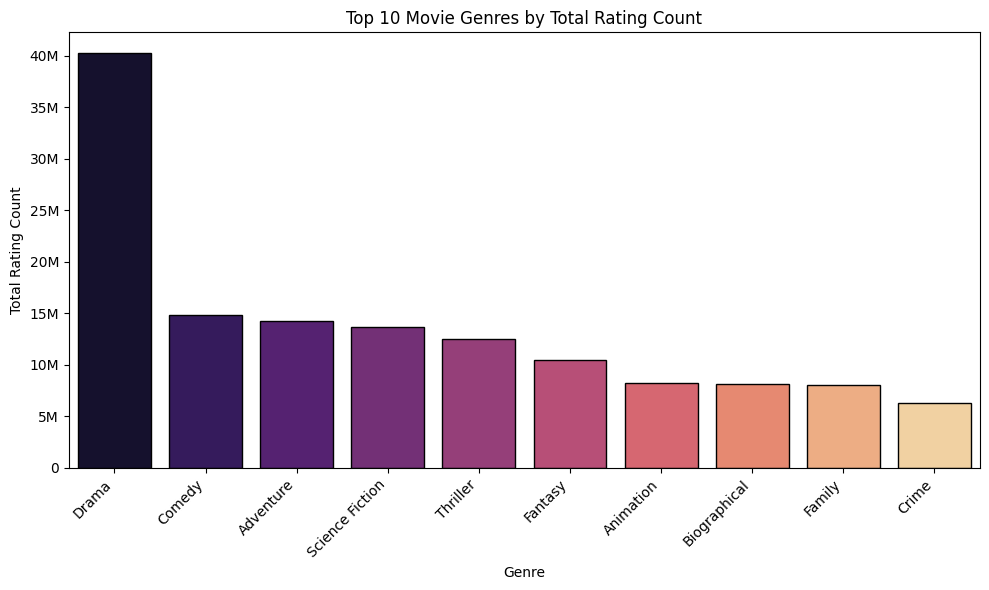

In [41]:
genre_rating_sum = df_genres.groupby('genres_en')['rating_count'].sum().sort_values(ascending=False).head(10)

top10_genres = genre_rating_sum.index.tolist()
top10_values = genre_rating_sum.values

plt.figure(figsize=(10,6))

ax = sns.barplot(
    x=top10_genres,
    y=top10_values,
    hue=top10_genres,
    palette='magma',
    dodge=False,
    legend=False,
    edgecolor='black' 
)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M' if x >= 1e6 else (f'{int(x/1e3)}K' if x >= 1e3 else f'{int(x)}')))

plt.title('Top 10 Movie Genres by Total Rating Count')
plt.xlabel('Genre')
plt.ylabel('Total Rating Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
df_genres.columns

Index(['position', 'title', 'year', 'duration', 'rating_value', 'rating_count',
       'critic_rating_value', 'critic_count', 'directors', 'screenwriters',
       'production_countries', 'world_premiere', 'polish_premiere',
       'boxoffice', 'boxoffice_usa', 'boxoffice_outside_usa', 'budget',
       'genres', 'duration_minutes', 'world_premiere_parsed',
       'polish_premiere_parsed', 'boxoffice_in$', 'boxoffice_usa_in$',
       'boxoffice_outside_usa_in$', 'budget_in$', 'genres_en'],
      dtype='object')

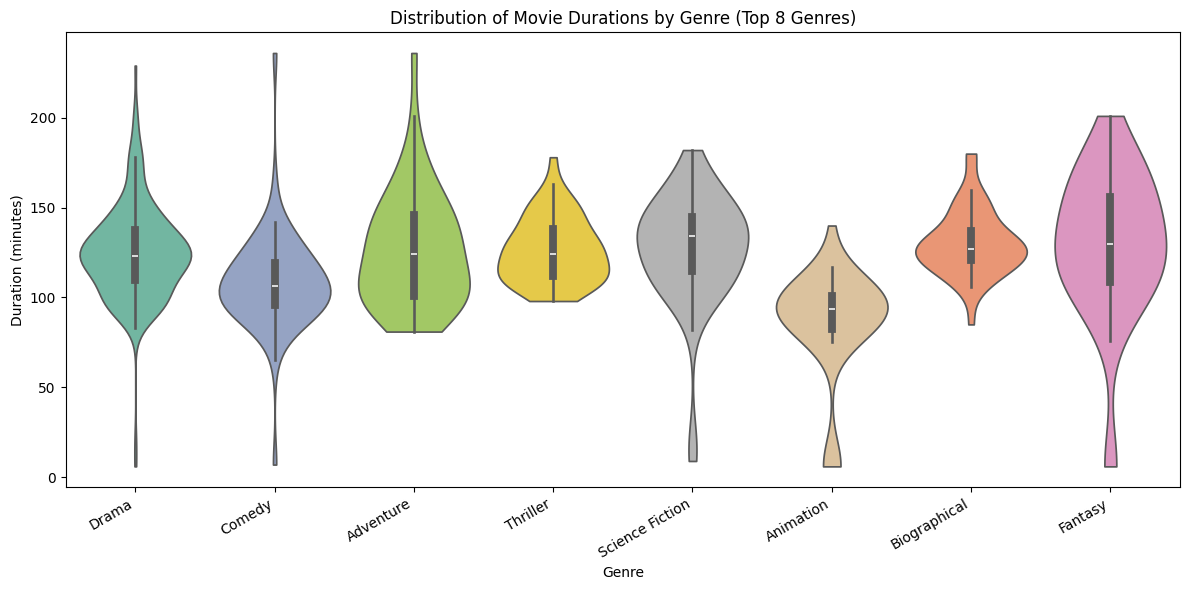

In [45]:
top_genres = df_genres['genres_en'].value_counts().head(8).index.tolist()
df_top = df_genres[df_genres['genres_en'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.violinplot(
    data=df_top,
    x='genres_en',
    y='duration_minutes',
    hue='genres_en',   
    order=top_genres,
    palette='Set2',
    legend=False, 
    cut=0
)
plt.title('Distribution of Movie Durations by Genre (Top 8 Genres)')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('genres_duration.png', dpi=300, bbox_inches='tight')
plt.show()

In [61]:
combos = [tuple(sorted(g)) for g in df['genres'] if len(g) > 1]
combo_counts = Counter(combos)
top_combos = combo_counts.most_common(10)

df_combos = pd.DataFrame(top_combos, columns=['combo', 'count'])
df_combos['combo_str'] = df_combos['combo'].apply(lambda x: ', '.join(x))

df_combos['hover_text'] = df_combos.apply(
    lambda row: f"Genres = {row['combo_str']}<br>Count = {row['count']}", axis=1
)

fig = px.treemap(
    df_combos,
    path=['combo_str'],
    values='count',
    title='Top 10 Most Common Genre Combinations',
    hover_data={'hover_text':True, 'combo_str':False, 'count':False}
)

fig.update_layout(
    title_x=0.5,
    width=1000,
    height=600,
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.update_traces(hovertemplate='%{customdata[0]}<extra></extra>')

fig.show()

Creating another version in English

In [63]:
print(top_combos)

[(('Dramat', 'Wojenny'), 21), (('Biograficzny', 'Dramat'), 15), (('Akcja', 'Sci-Fi'), 13), (('Dramat', 'Komedia'), 12), (('Dramat', 'Thriller'), 12), (('Dramat', 'Psychologiczny'), 10), (('Fantasy', 'Przygodowy'), 9), (('Kryminał', 'Thriller'), 9), (('Dramat', 'Gangsterski'), 8), (('Familijny', 'Fantasy', 'Przygodowy'), 7)]


In [66]:
combos = [tuple(sorted(g)) for g in df['genres'] if len(g) > 1]

combo_counts = Counter(combos)
top_combos = combo_counts.most_common(10)

df_combos = pd.DataFrame(top_combos, columns=['combo', 'count'])

unique_genres = set()
for combo in df_combos['combo']:
    unique_genres.update(combo)

genre_translation_subset = {
    'Dramat': 'Drama',
    'Wojenny': 'War',
    'Biograficzny': 'Biographical',
    'Akcja': 'Action',
    'Sci-Fi': 'Sci-Fi',
    'Komedia': 'Comedy',
    'Thriller': 'Thriller',
    'Psychologiczny': 'Psychological',
    'Fantasy': 'Fantasy',
    'Przygodowy': 'Adventure',
    'Kryminał': 'Crime',
    'Gangsterski': 'Gangster',
    'Familijny': 'Family'
}

df_combos['combo_en'] = df_combos['combo'].apply(
    lambda combo: [genre_translation_subset.get(g, g) for g in combo]
)

df_combos['combo_str_en'] = df_combos['combo_en'].apply(lambda x: ', '.join(x))

df_combos['hover_text_en'] = df_combos.apply(
    lambda row: f"Genres = {row['combo_str_en']}<br>Count = {row['count']}", axis=1
)

fig = px.treemap(
    df_combos,
    path=['combo_str_en'],
    values='count',
    title='Top 10 Most Common Genre Combinations',
    hover_data={'hover_text_en': True, 'combo_str_en': False, 'count': False}
)

fig.update_layout(
    title_x=0.5, 
    width=1000,
    height=600,
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.update_traces(hovertemplate='%{customdata[0]}<extra></extra>')
fig.write_html("genres_treemap.html")
#fig.write_image("genres_treemap.png")       # Uncomment to save static png version
fig.show()